In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
img_height,img_width = (224,224)
batch_size = 32
train_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\test_resnet\\output_type\\train"
valid_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\test_resnet\\output_type\\val"
test_data_dir = r"C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\test_resnet\\output_type\\test"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

valid_generator=train_datagen.flow_from_directory(
    valid_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 766 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


In [4]:
test_generator=train_datagen.flow_from_directory(
    test_data_dir,#same directory as training data
    target_size=(img_height,img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')#set as validation data

Found 73 images belonging to 2 classes.


In [5]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [6]:
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

for layer in base_model.layers:
    layer.trainable=False
    
    
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(64,activation='relu')(x)
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input ,outputs=predictions)



In [7]:
    
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model.fit(train_generator,
                         epochs = 50)

Epoch 1/50
24/24 [==============================] - 55s 2s/step - loss: 0.2403 - accuracy: 0.9112
Epoch 2/50
24/24 [==============================] - 39s 2s/step - loss: 0.0391 - accuracy: 0.9896
Epoch 3/50
24/24 [==============================] - 39s 2s/step - loss: 0.0228 - accuracy: 0.9948
Epoch 4/50
24/24 [==============================] - 39s 2s/step - loss: 0.0117 - accuracy: 0.9948
Epoch 5/50
24/24 [==============================] - 38s 2s/step - loss: 0.0116 - accuracy: 0.9974
Epoch 6/50
24/24 [==============================] - 40s 2s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/50
24/24 [==============================] - 38s 2s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/50
24/24 [==============================] - 39s 2s/step - loss: 0.0064 - accuracy: 0.9974
Epoch 9/50
24/24 [==============================] - 39s 2s/step - loss: 0.0351 - accuracy: 0.9909
Epoch 10/50
24/24 [==============================] - 39s 2s/step - loss: 0.0039 - accuracy: 0.9987
Epoch 11/50
24/24 [

In [11]:
model.save('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\save_test\\ResNet50type.h5' )

In [12]:
test_loss,test_acc = model.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

73/73 - 7s - loss: 2.0347e-05 - accuracy: 1.0000 - 7s/epoch - 93ms/step

test accuracy: 1.0


1/1 [==============================] - 0s 56ms/step


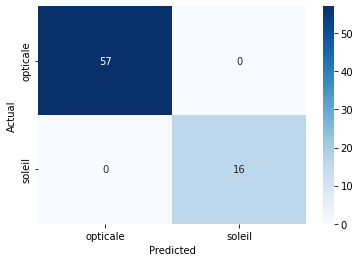

test accuracy:100.0


In [13]:
model = tf.keras.models.load_model('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\save_test\\ResNet50type.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [14]:
base_model2 = tf.keras.applications.ResNet50V2(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))

x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(64,activation='relu')(x)

for layer in base_model2.layers:
    layer.trainable=False
                     
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model2 = Model(inputs=base_model2.input ,outputs=predictions)



In [15]:
    
model2.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])
model2.fit(train_generator,
                         epochs = 35)

Epoch 1/35
24/24 [==============================] - 46s 2s/step - loss: 22.1496 - accuracy: 0.7728
Epoch 2/35
24/24 [==============================] - 39s 2s/step - loss: 9.7076 - accuracy: 0.8094
Epoch 3/35
24/24 [==============================] - 38s 2s/step - loss: 2.3928 - accuracy: 0.8499
Epoch 4/35
24/24 [==============================] - 39s 2s/step - loss: 1.0850 - accuracy: 0.9047
Epoch 5/35
24/24 [==============================] - 38s 2s/step - loss: 1.8634 - accuracy: 0.8603
Epoch 6/35
24/24 [==============================] - 39s 2s/step - loss: 0.9294 - accuracy: 0.9086
Epoch 7/35
24/24 [==============================] - 39s 2s/step - loss: 0.5841 - accuracy: 0.9230
Epoch 8/35
24/24 [==============================] - 38s 2s/step - loss: 0.3141 - accuracy: 0.9608
Epoch 9/35
24/24 [==============================] - 39s 2s/step - loss: 0.1570 - accuracy: 0.9530
Epoch 10/35
24/24 [==============================] - 38s 2s/step - loss: 0.2893 - accuracy: 0.9465
Epoch 11/35
24/24 

In [16]:
test_loss,test_acc = model2.evaluate(test_generator, verbose=2)
print('\ntest accuracy:' , test_acc)

73/73 - 6s - loss: 0.0529 - accuracy: 0.9863 - 6s/epoch - 84ms/step

test accuracy: 0.9863013625144958


In [17]:
model2.save('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\save_test\\ResNet50V2.h5' )

1/1 [==============================] - 0s 39ms/step


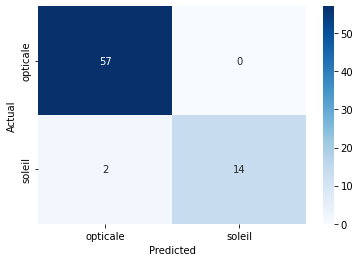

test accuracy:97.26027397260275


In [18]:
model2 = tf.keras.models.load_model('C:\\Users\\Admin\\machine learning\\machine learnig\\stage_ete_02\\test_type\\save_test\\ResNet50V2.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model2.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))